In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.DataFrame({"ds": ['2020-4-26','2020-5-3','2020-5-10','2020-5-17','2020-5-24','2020-5- 31','2020-6-7','2020-6-14','2020-6-21','2020-6-28'],
               "A": [164,127,157,127,170,322,133,176,233,257], "B": [306,405,267,265,306,265,325,297,310,271],
               "C": [23,41,75,24,48,31,51,26,41,43]})
df.head()

,ds,A,B,C
0,2020-4-26,164,306,23
1,2020-5-3,127,405,41
2,2020-5-10,157,267,75
3,2020-5-17,127,265,24
4,2020-5-24,170,306,48


In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# load dataset
df=pd.read_csv('/content/drive/My Drive/datasets/sales_mock.csv')
df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
df.shape

(913000, 4)

In [ ]:
df = df.loc[df['item'] == 1]

In [ ]:
df.drop('store',axis=1,inplace=True)
df.drop('item',axis=1,inplace=True)

In [ ]:
df.describe()

,sales
count,18260.000000
mean,21.981599
std,8.468922
min,1.000000
25%,16.000000
50%,21.000000
75%,27.000000
max,59.000000


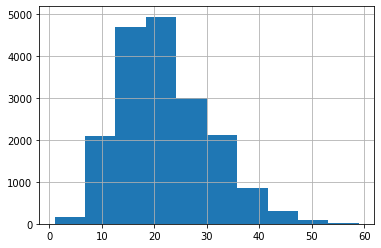

In [ ]:
df.sales.hist()

In [ ]:
df['date'] = pd.to_datetime(df.date)
# df = df.set_index('date')
# df.index = pd.to_datetime(df.index,yearfirst=True)
# df.index

In [ ]:

import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [ ]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# this code made the periods of time to be predicted!
future = model.make_future_dataframe(periods=6,freq='M')
future.tail(15)

,ds
1817,2017-12-23
1818,2017-12-24
1819,2017-12-25
1820,2017-12-26
1821,2017-12-27
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31
1826,2018-01-31


In [ ]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,18.616595,2.439510,19.401853,18.616595,18.616595,-7.859951,-7.859951,-7.859951,-1.686969,-1.686969,-1.686969,-6.172982,-6.172982,-6.172982,0.0,0.0,0.0,10.756645
1,2013-01-02,18.610783,2.145229,19.328511,18.610783,18.610783,-7.756140,-7.756140,-7.756140,-1.556109,-1.556109,-1.556109,-6.200031,-6.200031,-6.200031,0.0,0.0,0.0,10.854643
2,2013-01-03,18.604971,3.498341,21.274537,18.604971,18.604971,-6.521890,-6.521890,-6.521890,-0.286548,-0.286548,-0.286548,-6.235342,-6.235342,-6.235342,0.0,0.0,0.0,12.083081
3,2013-01-04,18.599158,4.563774,21.647423,18.599158,18.599158,-5.009679,-5.009679,-5.009679,1.268055,1.268055,1.268055,-6.277734,-6.277734,-6.277734,0.0,0.0,0.0,13.589479
4,2013-01-05,18.593346,6.878110,23.771160,18.593346,18.593346,-3.576697,-3.576697,-3.576697,2.749123,2.749123,2.749123,-6.325820,-6.325820,-6.325820,0.0,0.0,0.0,15.016649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,2018-02-28,25.368753,12.179033,29.245515,25.319749,25.421292,-5.040575,-5.040575,-5.040575,-1.556109,-1.556109,-1.556109,-3.484466,-3.484466,-3.484466,0.0,0.0,0.0,20.328178
1828,2018-03-31,25.447970,19.608545,35.694416,25.346042,25.553859,2.319891,2.319891,2.319891,2.749123,2.749123,2.749123,-0.429232,-0.429232,-0.429232,0.0,0.0,0.0,27.767861
1829,2018-04-30,25.524631,15.245005,31.027179,25.357019,25.695930,-2.221224,-2.221224,-2.221224,-4.537295,-4.537295,-4.537295,2.316071,2.316071,2.316071,0.0,0.0,0.0,23.303408
1830,2018-05-31,25.603848,20.643311,37.421260,25.355621,25.850165,3.624439,3.624439,3.624439,-0.286548,-0.286548,-0.286548,3.910987,3.910987,3.910987,0.0,0.0,0.0,29.228287


In [ ]:
forecast.shape


(1832, 19)

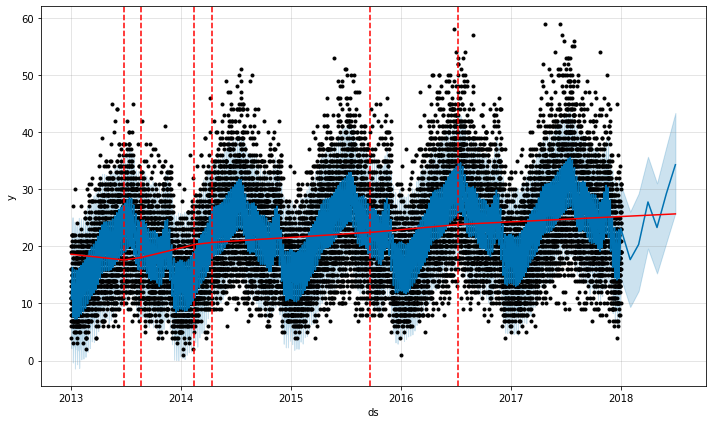

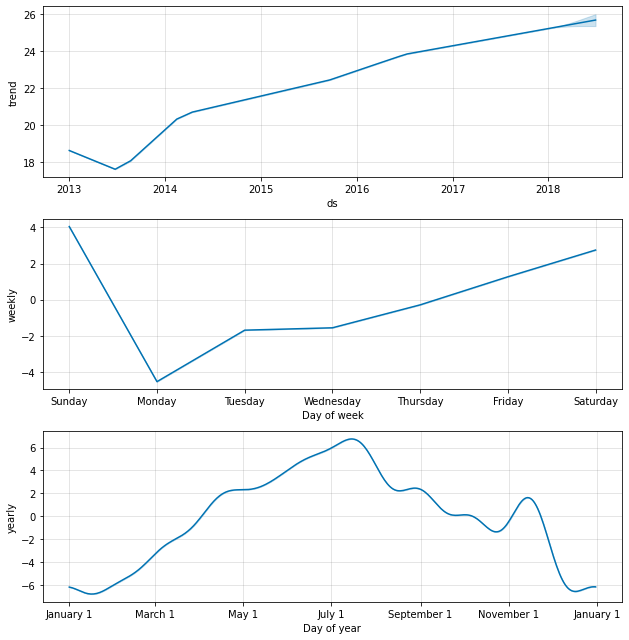

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
from matplotlib import pyplot as plt
plt.show()
fig2 = model.plot_components(forecast)
plt.show()
